In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import random

# Linear regression

Let D be a set of ponits in $R^n$ and $f_{\omega}(x_i)=\omega X$ be a liner model for data D. For instance,  if n=2 (data is in plane, two dimensional space) then $f_{\omega}(x_i)=[1, x_1][\omega_0, \omega_1]^T$.


# Gradian descent (GD);
let $J(\omega)=\frac{1}{2}\sum_{i=1}^{k} (f(x_i)-y_i)^2$ be the loss function (least squares). 
To find the min of J we use the following algorithem 

1- take gradien of J , $∇ J(\omega_{previous})=[\frac{∂J}{\partial \omega_i}]_i$ \\

2- For nitial point $(\omega_0)$ consider an arbitrary point of $\omega$ \\
3- $\omega_{new}= \omega_{previous} -\alpha ∇ J(\omega_{previous})$.

Note that $\alpha$ is called learning rate and if $\alpha$ is small the $\omega$ converge to min of J slowly, however if it is large $\omega$ may not converge to minimum. 




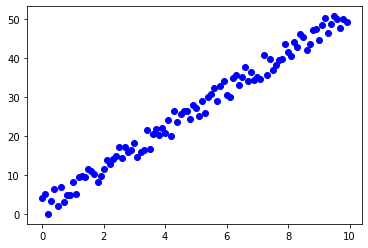

In [2]:
x=np.array([i/10 for i in range(0,100)])
y=np.array([2+5*j+random.uniform(-3,3) for j in x])
plt.scatter(x, y, c ="blue")

Then  $J(\omega)= \frac{1}{2}\sum_{i=1}^{100}((\omega_0+\omega_1 x_i)-y_i)^2$  

In [3]:
w0 = np.arange(-5, 5, 0.1)
w1 = np.arange(0,10 , 0.1)
omega0, omega1 = np.meshgrid(w0, w1)


In [4]:
J =np.zeros((100,100))
for i in range(100):
    for j in range(100):
        J[i,j]=np.array(((omega0[i,j]+omega1[i,j]*x-y).T.dot(np.array(omega0[i,j]+omega1[i,j]*x-y))/2))
     

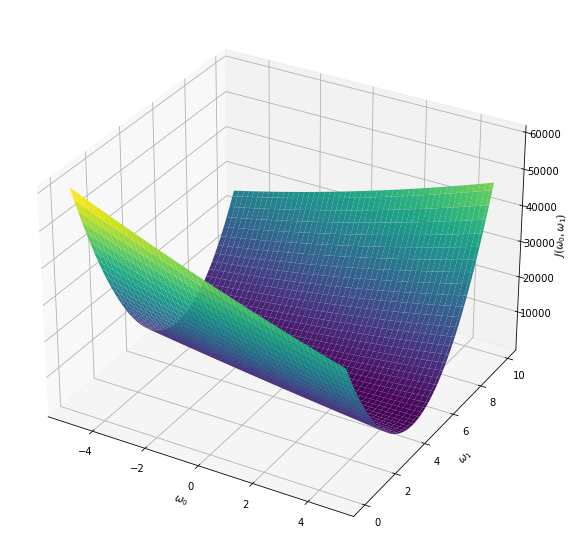

In [5]:

# plot
fig1 = plt.figure(figsize = (10, 10))
ax1 = fig1.add_subplot(projection = '3d')

ax1.plot_surface(omega0, omega1, J, cmap = 'viridis')

ax1.set_xlabel(r'$\omega_0$')
ax1.set_ylabel(r'$\omega_1$')
ax1.set_zlabel(r'$J(\omega_0, \omega_1)$')

plt.show()

In [6]:
def gradient_descent(X, y, omega_0, number_of_iterations, learning_rate):
    omega=omega_0
    intercept_ones = np.ones((len(X),1))        
    X_b = np.c_[intercept_ones,X] 
    loss_history=[]
    List_of_omega=[]
    
    gradient=[]
    for i in range(number_of_iterations):
        J_w=1/2*(X_b.dot(omega)-y).T.dot(X_b.dot(omega)-y)
        gradient =  (X_b.dot(omega)-y).T.dot(X_b) # calculate gradient
        omega = omega - learning_rate * gradient 
        
        if i%10==0:
            List_of_omega.append(omega)
            loss_history.append(J_w)

    return List_of_omega,loss_history
        

GD=gradient_descent(x, y, np.array([-2, 6 ]), 1000, .0002)
GD[0]

[array([-2.01985424,  5.72457928]),
 array([-1.8309657 ,  5.55982378]),
 array([-1.63202137,  5.52960186]),
 array([-1.44273038,  5.50084828]),
 array([-1.26262459,  5.47348995]),
 array([-1.09125829,  5.44745915]),
 array([-0.9282074 ,  5.42269148]),
 array([-0.77306843,  5.39912565]),
 array([-0.62545746,  5.37670332]),
 array([-0.4850092 ,  5.35536902]),
 array([-0.35137608,  5.33506995]),
 array([-0.2242274 ,  5.31575588]),
 array([-0.10324851,  5.29737901]),
 array([0.01185998, 5.27989386]),
 array([0.12138291, 5.26325717]),
 array([0.22559133, 5.24742776]),
 array([0.32474312, 5.23236645]),
 array([0.41908364, 5.21803599]),
 array([0.50884637, 5.2044009 ]),
 array([0.59425342, 5.19142744]),
 array([0.67551617, 5.17908351]),
 array([0.75283571, 5.16733856]),
 array([0.82640337, 5.15616352]),
 array([0.89640123, 5.14553074]),
 array([0.96300249, 5.13541391]),
 array([1.02637198, 5.125788  ]),
 array([1.08666651, 5.11662917]),
 array([1.1440353 , 5.10791476]),
 array([1.19862031, 5.

# Visualizing Gradient Descent

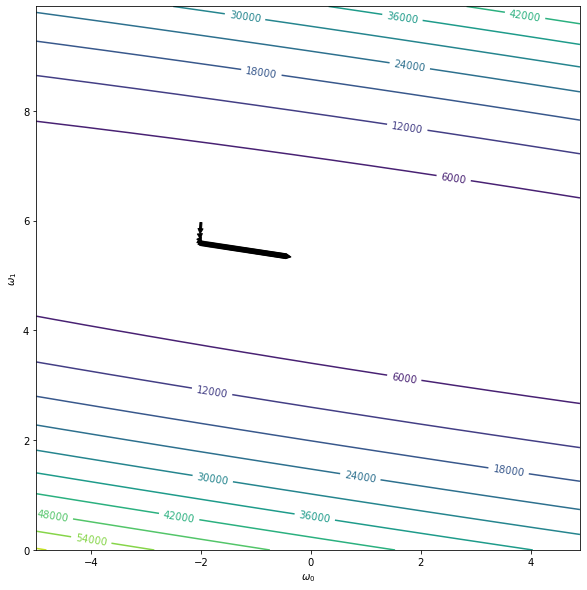

In [7]:

from matplotlib.patches import FancyArrowPatch

fig2 = plt.figure(figsize = (10, 10))
ax2 = fig2.add_subplot()


C = ax2.contour(omega0, omega1,J, levels = 10)

ax2.clabel(C, inline = True, fontsize = 10)
ax2.set_aspect('equal')
ax2.set_xlabel(r'$\omega_0$')
ax2.set_ylabel(r'$\omega_1$')

one=np.array([1 for i in range(100)])
alpha = 0.0002
w0, w1 = -2, 6     
for i in range(100):
    dJ_dw0, dJ_dw1 = np.dot(w0*one+w1*x-y,one), np.dot(w0*one+w1*x-y,x) 
    w0_1, w1_1 = w0 - alpha*dJ_dw0, w1 - alpha*dJ_dw1
    
    arrow = FancyArrowPatch((w0, w1), (w0_1, w1_1), arrowstyle='simple', color='k', mutation_scale=10)
    ax2.add_patch(arrow)
    
    w0, w1 = w0_1, w1_1
plt.show()




Minimize the function J using gradient descent.

The gradient of $J$ is $\nabla J(\omega) = [\sum ((\omega_0+\omega_1 x_i)-y_i), \sum ((\omega_0+\omega_1 x_i)-y_i)x_i]$. 

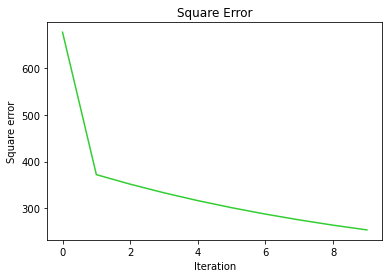

In [8]:
plt.plot(range(10),GD[1][:10], color="limegreen")
plt.title("Square Error")
plt.xlabel("Iteration")
plt.ylabel("Square error")
plt.show()


We can find the minimum of  $J(\omega)=(y-X\omega)^T(y-X\omega)$ by differentiate the function, set it equal to zero, solve for $\omega$ and we get:
         $$\omega=(X^TX)^{-1}X^Ty.$$
         
This is without Gradient Descent. Just by solving the equation $\nabla J_{\omega}=0$

In [9]:
def LR_WOGD(X,y):
    intercept_ones = np.ones((len(X),1))        
    X_b = np.c_[intercept_ones,X]               # we add ones as a new column to our X
    w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # the normal equation
    return w
    

In [10]:
w=LR_WOGD(x,y)
w

array([2.26893776, 4.93704042])

let's check our result with linear regresion in sklearn 

In [11]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression().fit(x.reshape(-1, 1),y)
print(LR.intercept_, LR.coef_[0])

2.2689377625359803 4.937040421449924


In [12]:
intercept_ones = np.ones((len(x),1))        
x_b = np.c_[intercept_ones,x]

/var/folders/xw/ggml5mhd4n7315516lvx2p6c0000gn/T/ipykernel_25149/853292945.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x,np.dot(x_b , w), 'g', label='LR-WOGD', color="yellow" )


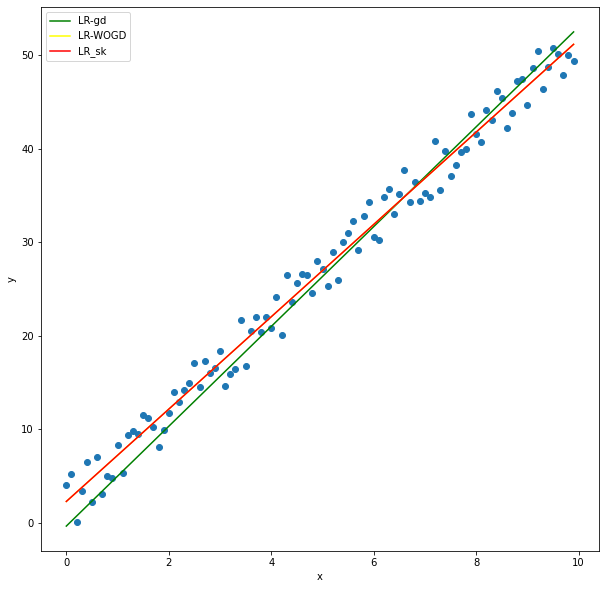

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.plot(x, w0 + w1*x, 'g', label='LR-gd')
plt.plot(x,np.dot(x_b , w), 'g', label='LR-WOGD', color="yellow" )
plt.plot(x, LR.intercept_ + LR.coef_[0]*x, '-r', label='LR_sk')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Stochastic gradient descent (SGD)

SGD can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data). Especially in high-dimensional optimization problems this reduces the very high computational burden, achieving faster iterations in trade for a lower convergence rate.

Choose an initial vector of parameters $\omega$ and learning rate $\alpha$.

Repeat the following prosess until an approximate minimum is obtained:

Randomly shuffle samples in the training set.

For $ i=1,2,\cdots,m$, do:  \\

$\omega:=\omega- \alpha \nabla J_i(\omega).$

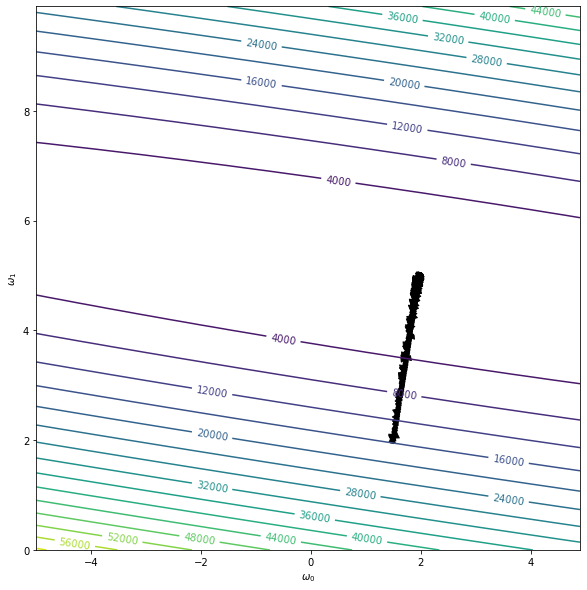

In [15]:
import random
fig2 = plt.figure(figsize = (10, 10))
ax2 = fig2.add_subplot()


C = ax2.contour(omega0, omega1, J, levels = 15)

ax2.clabel(C, inline = True, fontsize = 10)
ax2.set_aspect('equal')
ax2.set_xlabel(r'$\omega_0$')
ax2.set_ylabel(r'$\omega_1$')


alpha = 0.0002
w0, w1 = 3/2, 2    
for i in range(800):
    j=random.randint(0,99)
    dJ_dw0, dJ_dw1 = w0+w1*x[j]-y[j], (w0+w1*x[j]-y[j])*x[j]
    w0_1, w1_1 = w0 - alpha*dJ_dw0, w1 - alpha*dJ_dw1
    
    arrow = FancyArrowPatch((w0, w1), (w0_1, w1_1), arrowstyle='simple', color='k', mutation_scale=10)
    ax2.add_patch(arrow)
    
    w0, w1 = w0_1, w1_1
    
plt.show()

In [16]:
squareError=np.array([])
alpha = 0.0002
w0, w1 = 1, -4     
for i in range(800):
    j=random.randint(0,99)
    dJ_dw0, dJ_dw1 = w0+w1*x[j]-y[j], (w0+w1*x[j]-y[j])*x[j]
    w0_1, w1_1 = w0 - alpha*dJ_dw0, w1 - alpha*dJ_dw1
    squareError=np.append(squareError,1/2*np.dot((w0*one+w1*x-y)**2,one) )
    w0, w1 = w0_1, w1_1
    if i%40==0:
        print([w0, w1])

[1.00790866506367, -3.967574473238953]
[1.3037622102350004, -2.003870753791616]
[1.5338919153910793, -0.504335172966079]
[1.70377884776747, 0.5956028567808387]
[1.8560451804591513, 1.6748563819245283]
[1.9668393812527094, 2.386343876603253]
[2.0614065595758113, 3.033683851271382]
[2.1183566953579476, 3.3873843728774564]
[2.1679279955949022, 3.6616655648136973]
[2.2213995299852103, 4.06940979924891]
[2.2542559106247486, 4.29423243183507]
[2.282919124162548, 4.489478212330085]
[2.2974663696536077, 4.576486105766744]
[2.3070018168738367, 4.649715887744293]
[2.319422714804221, 4.725765936192128]
[2.326458114804711, 4.7804219288957706]
[2.3313243629316327, 4.815812368340463]
[2.335136459204608, 4.832702049034282]
[2.337074913327693, 4.843739216666798]
[2.340422938506133, 4.857322272912003]


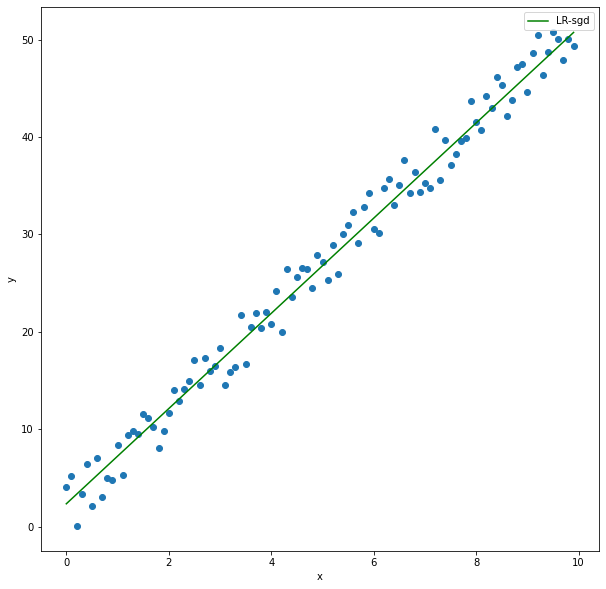

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(x, y)
plt.plot(x, w0 + w1*x, 'g', label='LR-sgd')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

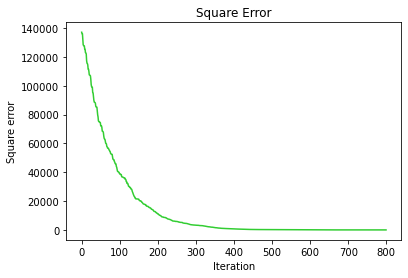

In [18]:
plt.plot(range(800),squareError, color="limegreen")
plt.title("Square Error")
plt.xlabel("Iteration")
plt.ylabel("Square error")
plt.show()

Calculation in SGD is lighter than GD however it might converged to minimum very slowly. 

# Regularized Regression

To stabilize the basic linear regression and strengthen it against outliers, overfitting, and other factors, lasso and ridge are used.

## Ridge Regression

Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are $highly\ correlated$.

In simple case we are going to find the minimum of the cost function $J(\omega)=\sum_{i=1}^m (f_{\omega}(x_i)-y_i)^2+\lambda \sum_{j=1}^n \omega_j^2$. Notice that $\omega_0=0$.It is used for high variance and high bias to low variance and low bias to avoid overfiting. In the formula $\lambda>0$ and is called Ridge parametres , user can select $\lambda$ to so that it produces lowest MSE (Mean square error),and $\lambda \sum_{j=1}^n \omega_j^2$ is called ridge penalty. We can write $J(\omega)=(y-X\omega)^T(y-X\omega)+\lambda \omega^T\omega$. We now differentiate this function, set it equal to zero, solve for $\boldsymbol{\theta}$ and we get:
         $$\omega=(X^TX+\lambda I)^{-1}X^Ty,$$
where $I$ is an identity matrix with dimensions $(n+1)(n+1)$.

In [19]:
#define URL where data is located
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/mtcars.csv"

#read in data
data = pd.read_csv(url)

In [20]:
data=data[["mpg", "wt", "drat", "qsec", "hp"]]
data.head()

,mpg,wt,drat,qsec,hp
0,21.0,2.620,3.90,16.46,110
1,21.0,2.875,3.90,17.02,110
2,22.8,2.320,3.85,18.61,93
3,21.4,3.215,3.08,19.44,110
4,18.7,3.440,3.15,17.02,175


In [21]:
y = data["hp"]
X = data[["mpg", "wt", "drat", "qsec"]]

In [22]:
def Ridged(X,y, lambd):
    intercept_ones = np.ones((len(X),1))        
    X_b = np.c_[intercept_ones,X]               # we add ones as a new column to our X
    I = np.identity(X_b.shape[1])               # identity matrix 
    I[0][0] = 0                                 #the forst entry should be zero because of Ridge pelenty does not have w0
    w = np.linalg.inv(X_b.T.dot(X_b) + lambd * I).dot(X_b.T).dot(y) # the normal equation
    return w


In [23]:
w=Ridged(X,y, 1)
w

array([493.43640225,  -3.45547703,  21.76947228,   3.13962063,
       -20.09417385])

Let's compare it to solution in sklearn pacage. 

In [24]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=.1)
clf.fit(X[["mpg","wt","drat","qsec"]], y)

Ridge(alpha=0.1)

In [25]:
clf.coef_

array([ -2.94346446,  25.53430703,   4.59733896, -20.67891414])

In [26]:
clf.intercept_

476.2314433128985

In [27]:
np.dot(w,[ 1, 2.5, 3.5, 18.5 , 24])

136.8136718362966

## Gradient Descent in case of Ridge LR

Alternatively to solving the normal equation, we can differentiate the ridge cost function to obtain its partial derivatives (i.e. compute its gradient) and then perform gradient descent to iteratively approach the optimal solution. 

In [28]:
def R_gradient_descent(X, y, omega_0, number_of_iterations, learning_rate, Ridge_penalty):
    omega=omega_0
    intercept_ones = np.ones((len(X),1))        
    X_b = np.c_[intercept_ones,X] 
    loss_history=[]
    List_of_omega=[]

    
    for i in range(number_of_iterations):
        omega_o=np.array([0]+[omega[i] for i in range(1,len(omega))])
        J_w=1/2*(X_b.dot(omega)-y).T.dot(X_b.dot(omega)-y)+Ridge_penalty*omega_o.T.dot(omega_o)
        gradient =  (X_b.dot(omega)-y).T.dot(X_b)+Ridge_penalty*omega_o # calculate gradient
        omega = omega - learning_rate * gradient 
        
        if i%10==0:
            List_of_omega.append(omega)
            loss_history.append(J_w)

    return List_of_omega,loss_history

In [29]:


RGD=R_gradient_descent(X, y, np.array([490,  -2,  20,   2, -21]), 3000,.00008 , 1)




In [30]:
RGD[0][-1]

array([490.368799  ,  -3.4367867 ,  21.98480228,   3.31191277,
       -20.01769178])

## Lasso Regression 

Lasso is similar to Ridge regression with the cost function $J(\omega)=\sum_{i=1}^m (f_{\omega}(x_i)-y_i)^2+\lambda \sum_{j=1}^n |\omega_j|$.

In [31]:
def Lasso_gradient_descent(X, y, omega_0, number_of_iterations, learning_rate, Ridge_penalty):
    omega=omega_0
    intercept_ones = np.ones((len(X),1))        
    X_b = np.c_[intercept_ones,X] 
    loss_history=[]
    List_of_omega=[]
    m=len(X)
    
    for i in range(number_of_iterations):
        omega_o=[0] #replace omega[0]=0
        for j in range(1,len(omega)):
            if omega[j]>=0:
                omega_o.append(omega[j])
            else:
                omega_o.append(-omega[j])
        omega_o=np.array(omega)       
        J_w=1/(2*m)*((X_b.dot(omega)-y).T.dot(X_b.dot(omega)-y)+Ridge_penalty*omega_o.T.dot(omega_o))
        gradient=[]
        for j in range(len(omega)):# calculate gradient in lasso 
            if j==0:
                gradient.append(1/m*(np.dot((X_b[:,j]*omega[j]-y),X_b[:,j])))
            else:
                if omega[j]>=0:
                     gradient.append(1/m*(np.dot((X_b[:,j]*omega[j]-y),X_b[:,j])+Ridge_penalty))
                else:
                     gradient.append(1/m*(np.dot((X_b[:,j]*omega[j]-y),X_b[:,j])-Ridge_penalty))
                
        gradient=np.array(gradient)
        omega = omega - learning_rate * gradient 
        
        #if i%10==0:
        List_of_omega.append(omega)
        loss_history.append(J_w)

    return List_of_omega,loss_history

In [32]:
Lasso=Lasso_gradient_descent(X, y, np.array([490,  25,  2,  -21, -2]), 30,.0002 , 0.1)
Lasso[0][-1]

array([487.9460875 ,   7.21496402,   4.85851225, -16.44245167,
         6.53433782])

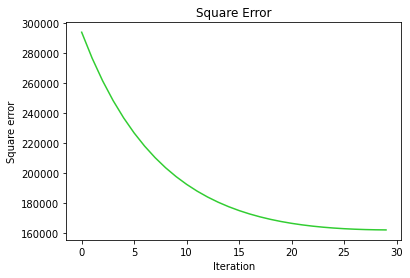

In [33]:
plt.plot(range(30),Lasso[1], color="limegreen")
plt.title("Square Error")
plt.xlabel("Iteration")
plt.ylabel("Square error")
plt.show()

Lets see lasso in sklearn

In [34]:
from sklearn.linear_model import Lasso

In [35]:
lasso = Lasso(alpha = .1)
lasso.fit(X[["mpg","wt","drat","qsec"]],y)


Lasso(alpha=0.1)

In [36]:
lasso.coef_

array([ -2.92664177,  25.32202202,   3.88604722, -20.69213083])

In [37]:
lasso.intercept_

479.370545389566